In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!ls 'My Drive/summer internship'

 09-07-2020		       'ASSIGNMENT-37 [09-07-2020].ipynb'
'(10-07-2020) & (11-07-2020)'  'DAY45-stock price prediction(16-07-2020).ipynb'
 20-06-2020.ipynb	       'Google stock price prediction-Copy1.ipynb'
 all_stocks_5yr.csv	        titanic.csv


In [ ]:
# all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/summer internship/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [ ]:
#top five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
### How many companies data we have here?
data.Name.nunique()

505

In [ ]:
## Selecting the data AAL
df = data[data['Name']=='AAL']
df.shape

(1259, 7)

In [ ]:
## select the columns date and close price
df = df[['date','close']]
df

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


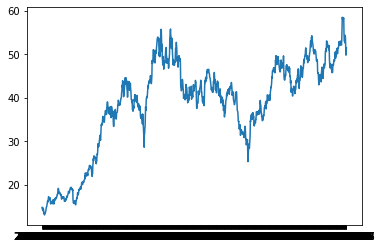

In [ ]:
#line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [ ]:
df.date[:10]

0    2013-02-08
1    2013-02-11
2    2013-02-12
3    2013-02-13
4    2013-02-14
5    2013-02-15
6    2013-02-19
7    2013-02-20
8    2013-02-21
9    2013-02-22
Name: date, dtype: object

In [ ]:
## missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [ ]:
## preparing the data
## features and target
## input and output
## last 7 day data as input
## X -- [[d1-d7],[d9-d15],[d17-d23].....]
## y -- [d8,d16,d24,...]

## X --[[d1-d7],[d2-d8],..]
## y --[d8,d9,...]
X = [] ##input
y = [] ##output
for i in range(df.shape[0]-7-1):
  X.append(df['close'][i:i+7])
  y.append(df['close'][i+7])
print(X[:2])

[0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
Name: close, dtype: float64, 1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
7    13.33
Name: close, dtype: float64]


In [ ]:
import numpy as np
X = np.array(X)

In [ ]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02


In [ ]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26,13.33
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33,13.37
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37,13.57
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57,13.02
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02,13.26


In [ ]:
df.close[:15]

0     14.75
1     14.46
2     14.27
3     14.66
4     13.99
5     14.50
6     14.26
7     13.33
8     13.37
9     13.57
10    13.02
11    13.26
12    13.41
13    13.43
14    13.61
Name: close, dtype: float64

In [ ]:
df1.shape

(1251, 8)

In [ ]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train = df1['d8'][:1000]
y_test = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [ ]:
## scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.107026e-17,1.179057e-16,3.196332e-16,8.437695e-18,-2.058353e-16,6.408207e-16,3.573808e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.119798e+00,-2.125939e+00,-2.132307e+00,-2.138824e+00,-2.145197e+00,-2.151939e+00,-2.158392e+00
25%,-5.582080e-01,-5.486430e-01,-5.493180e-01,-5.516601e-01,-5.450605e-01,-5.350756e-01,-5.332242e-01
50%,2.659776e-01,2.649882e-01,2.640589e-01,2.640761e-01,2.641178e-01,2.631759e-01,2.621305e-01
75%,6.620601e-01,6.644832e-01,6.649275e-01,6.633158e-01,6.633343e-01,6.668651e-01,6.666995e-01
max,1.847059e+00,1.847165e+00,1.847513e+00,1.847976e+00,1.848369e+00,1.848914e+00,1.849089e+00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
X_test.shape

(251, 7)

In [ ]:
# number of records,time steps, features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [ ]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3524 - val_loss: 2.4482
Epoch 2/100
1000/1000 [==============================] - 1s 977us/step - loss: 1.7205 - val_loss: 3.1567
Epoch 3/100
1000/1000 [==============================] - 1s 960us/step - loss: 1.5958 - val_loss: 1.5186
Epoch 4/100
1000/1000 [==============================] - 1s 960us/step - loss: 1.3269 - val_loss: 1.7659
Epoch 5/100
1000/1000 [==============================] - 1s 964us/step - loss: 1.5431 - val_loss: 1.4771
Epoch 6/100
1000/1000 [==============================] - 1s 961us/step - loss: 1.3129 - val_loss: 1.4980
Epoch 7/100
1000/1000 [==============================] - 1s 998us/step - loss: 1.2509 - val_loss: 1.5254
Epoch 8/100
1000/1000 [==============================] - 1s 989us/step - loss: 1.2523 - val_loss: 1.4413
Epoch 9/100
1000/1000 [==============================] - 1s 986us/step - loss: 1.2366 - val_loss: 1.5775
Epoch 10/1

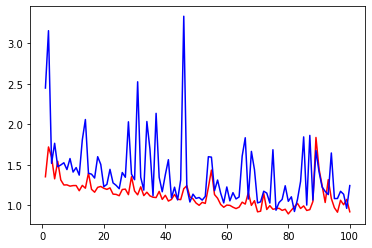

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model.predict(X_test_sc)

array([[44.677635],
       [44.594894],
       [45.487545],
       [45.90764 ],
       [46.674377],
       [46.306244],
       [46.85215 ],
       [46.656147],
       [46.492813],
       [46.395508],
       [46.002525],
       [45.718765],
       [45.776566],
       [45.83935 ],
       [45.878246],
       [46.424778],
       [45.601906],
       [46.09949 ],
       [45.22837 ],
       [44.5265  ],
       [44.412437],
       [43.249344],
       [43.2657  ],
       [42.255737],
       [41.02179 ],
       [41.32987 ],
       [41.572094],
       [41.28823 ],
       [41.16333 ],
       [40.239952],
       [39.85486 ],
       [40.576088],
       [41.087666],
       [41.186417],
       [41.818523],
       [41.59121 ],
       [41.857468],
       [41.824554],
       [41.878506],
       [40.789257],
       [40.67933 ],
       [41.06579 ],
       [41.238976],
       [41.632187],
       [42.942474],
       [43.40561 ],
       [42.994133],
       [43.493057],
       [43.405224],
       [43.740395],


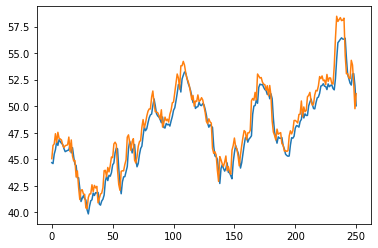

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [ ]:
X_test_sc[0].reshape(1,7,1)

array([[[0.83910218],
        [0.77719701],
        [0.75711333],
        [0.75193205],
        [0.7682191 ],
        [0.86976278],
        [0.85612661]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[45.30925]], dtype=float32)

In [ ]:
y_test[1000]

45.06

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
X_test.shape

(251, 7)

In [ ]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 979us/step - loss: 4.0270 - val_loss: 1.3858
Epoch 2/100
1000/1000 [==============================] - 1s 978us/step - loss: 3.6329 - val_loss: 1.1770
Epoch 3/100
1000/1000 [==============================] - 1s 964us/step - loss: 3.5326 - val_loss: 1.4523
Epoch 4/100
1000/1000 [==============================] - 1s 952us/step - loss: 3.9029 - val_loss: 1.8432
Epoch 5/100
1000/1000 [==============================] - 1s 990us/step - loss: 3.8091 - val_loss: 1.8628
Epoch 6/100
1000/1000 [==============================] - 1s 955us/step - loss: 3.5093 - val_loss: 1.1194
Epoch 7/100
1000/1000 [==============================] - 1s 977us/step - loss: 3.4453 - val_loss: 1.1296
Epoch 8/100
1000/1000 [==============================] - 1s 968us/step - loss: 3.3225 - val_loss: 1.3977
Epoch 9/100
1000/1000 [==============================] - 1s 979us/step - loss: 3.4259 - val_loss: 1.3036
Epoch 10

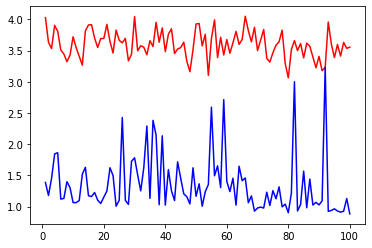

In [ ]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model2.predict(X_test_sc)

array([[45.344677],
       [45.286335],
       [45.97665 ],
       [46.447086],
       [47.141148],
       [46.94813 ],
       [47.3289  ],
       [47.26048 ],
       [47.131023],
       [47.04632 ],
       [46.719948],
       [46.4475  ],
       [46.45431 ],
       [46.511097],
       [46.54912 ],
       [46.981045],
       [46.386715],
       [46.669384],
       [46.04049 ],
       [45.355907],
       [45.16039 ],
       [44.18287 ],
       [44.013462],
       [43.157246],
       [41.92956 ],
       [41.945377],
       [42.23238 ],
       [42.07375 ],
       [41.89213 ],
       [41.022125],
       [40.495197],
       [41.086826],
       [41.73818 ],
       [41.933376],
       [42.44244 ],
       [42.299244],
       [42.474754],
       [42.494785],
       [42.548428],
       [41.619   ],
       [41.321846],
       [41.639626],
       [41.92703 ],
       [42.305447],
       [43.466602],
       [44.035976],
       [43.745674],
       [44.047924],
       [44.052082],
       [44.361652],
